In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats
import statsmodels.graphics.api as smg


df= pd.read_csv('Suicide-rates.csv')


In [93]:
# There's a lot of datalet in this set so I decided to sample down to 10%, so this dataset is much less cumbersome
# now I can handle this dataset much simpler
df = df.sample(frac=0.25, replace=True)

df[['country', 'year', 'sex','suicides_no','generation' ]].head()


,country,year,sex,suicides_no,generation
14568,Kyrgyzstan,1997,male,90,Generation X
2945,Barbados,1989,female,0,G.I. Generation
11868,Iceland,2001,male,5,Generation X
21440,Saint Lucia,1998,male,1,G.I. Generation
17984,Norway,1995,female,11,G.I. Generation


In [94]:
#retrieving mean of the number of suicides 
df['suicides_no'].describe()

count     6955.000000
mean       235.765780
std        824.737174
min          0.000000
25%          2.000000
50%         24.000000
75%        136.000000
max      20119.000000
Name: suicides_no, dtype: float64

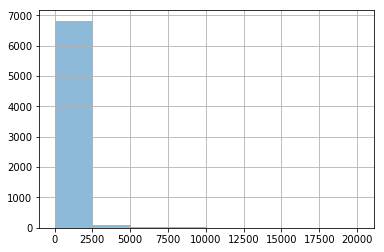

In [95]:
df['suicides_no'].hist(bins=8, alpha=.5)

In [96]:
# creating a dict file  
# change value of sex from sting to int
sex = {'male': 1,'female': 2} 
df.sex = [sex[item] for item in df.sex] 

In [97]:
generation = {'Generation X': 1,'Silent': 2, 'Boomers':3, 'G.I. Generation':4, 'Millenials':5, 'Generation Z': 6} 
df.generation = [generation[item] for item in df.generation] 

In [98]:
#country = {'Greece': 1,'United States': 2, 'Finland':3, 'Saint Vincent and Grenadines':4, 'Denmark':5, 'Luxembourg':6, 'Seychelles':7, 'Mexico':8, } 
#df.country = [country[item] for item in df.country] 

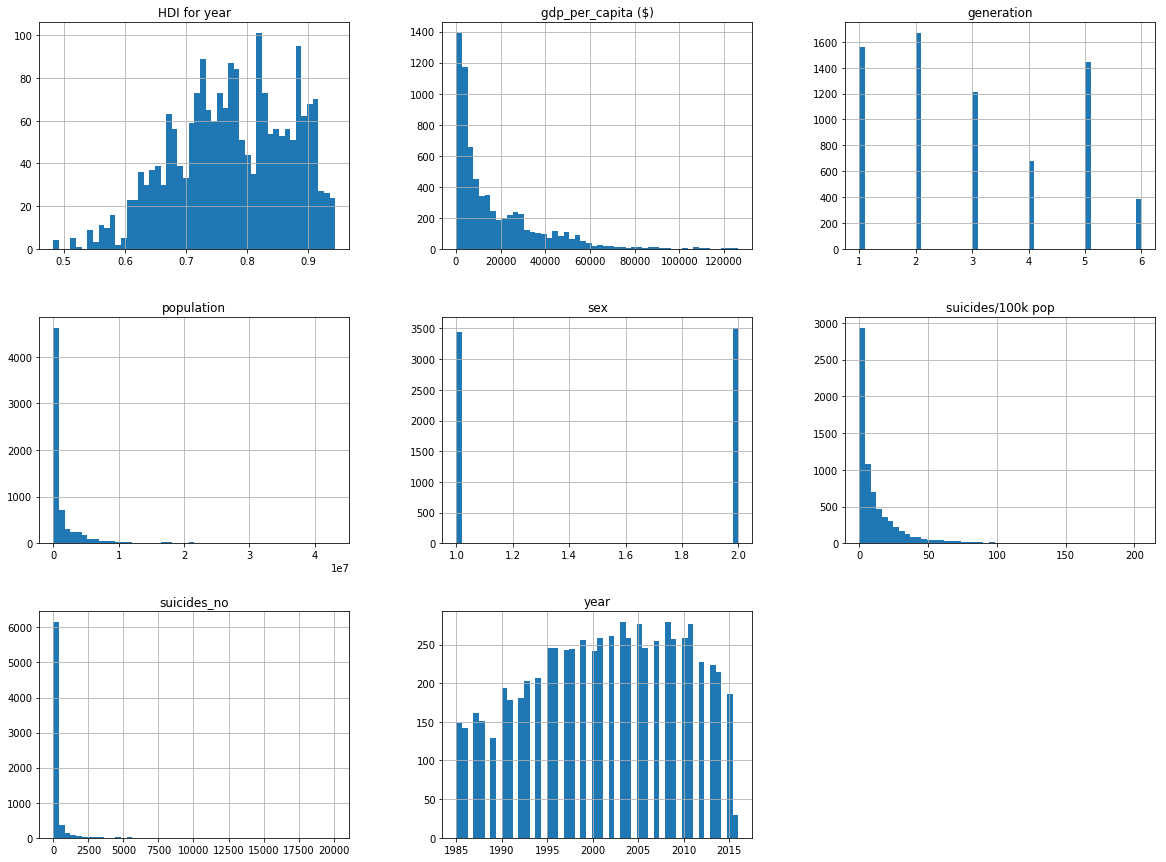

In [99]:
#histogram is used to graphically summarize and display the distribution 
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002126840DA90>]],
      dtype=object)

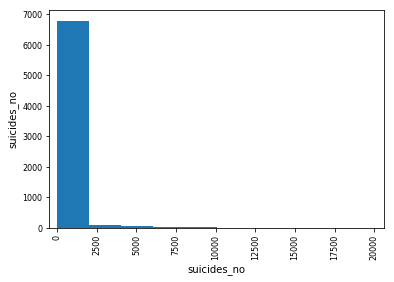

In [100]:
#show how much one variable is affected by anotherr
pd.plotting.scatter_matrix(df[['country', 'suicides_no', ]], alpha=0.3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021268E47EB8>,
      dtype=object)

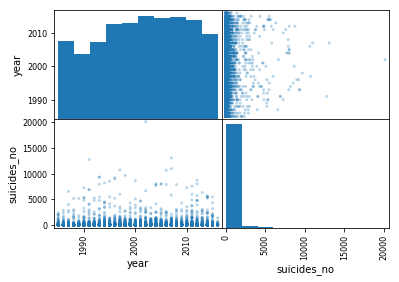

In [101]:
pd.plotting.scatter_matrix(df[['year', 'suicides_no', ]], alpha=0.3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021268F47048>,
      dtype=object)

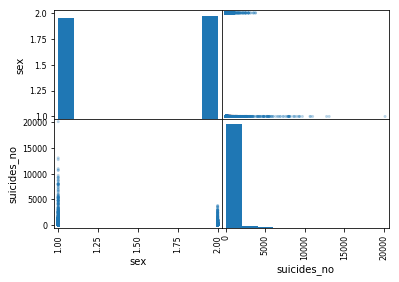

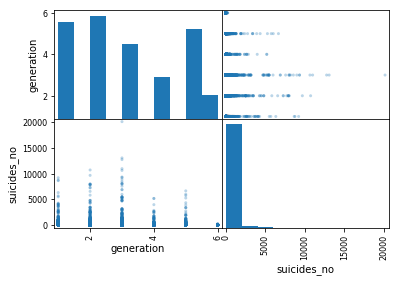

In [102]:
pd.plotting.scatter_matrix(df[['sex', 'suicides_no', ]], alpha=0.3)
pd.plotting.scatter_matrix(df[['generation', 'suicides_no', ]], alpha=0.3)

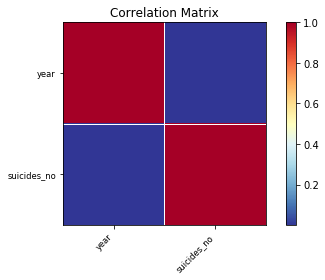

In [103]:
corr_matrix = np.corrcoef(df[[ 'year', 'suicides_no', ]].T)
smg.plot_corr(corr_matrix, xnames=df[[ 'year', 'suicides_no' ]].columns)
plt.show()

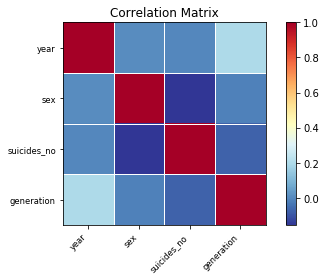

In [104]:
#a table showing correlation coefficients between variable,each cell in the table shows the correlation between two variables.
corr_matrix = np.corrcoef(df[[ 'year', 'sex','suicides_no','generation' ]].T)
smg.plot_corr(corr_matrix, xnames=df[[ 'year', 'sex','suicides_no','generation' ]].columns)
plt.show()



In [105]:
## Coorrelation Results
# According to the correlation matrix there is a there is a light correlation between the number of suicides and the victims' generation as well as a light coorelation between the vaiable of yeara and the number suicides
# though there doesn't seem to be a correlation between the sex of the victim and the suicide numbers 


In [ ]:
#START OF EDA FINAL

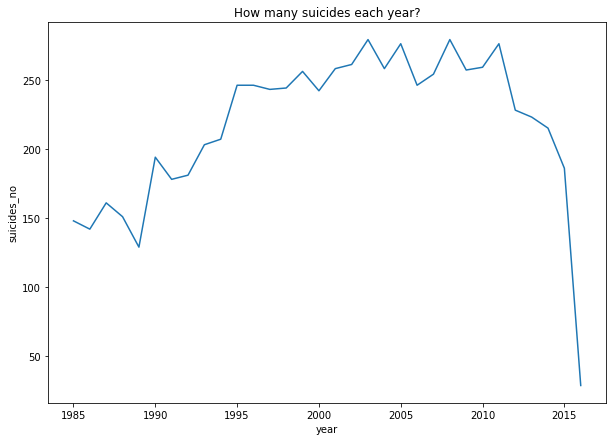

In [241]:
#decided to create a line graph as one of my new visualizations
plt.figure(figsize=(10, 7))
year_count = df.year.value_counts()
year_count = year_count.reset_index()
year_count.columns = ["year", "suicides_no"]
year_count = year_count.sort_values(by = 'year')
sns_plot = sns.lineplot(x = year_count['year'], y = year_count['suicides_no']).set_title("How many suicides each year?")
sns_plot.figure.savefig("records_each_year.jpg")

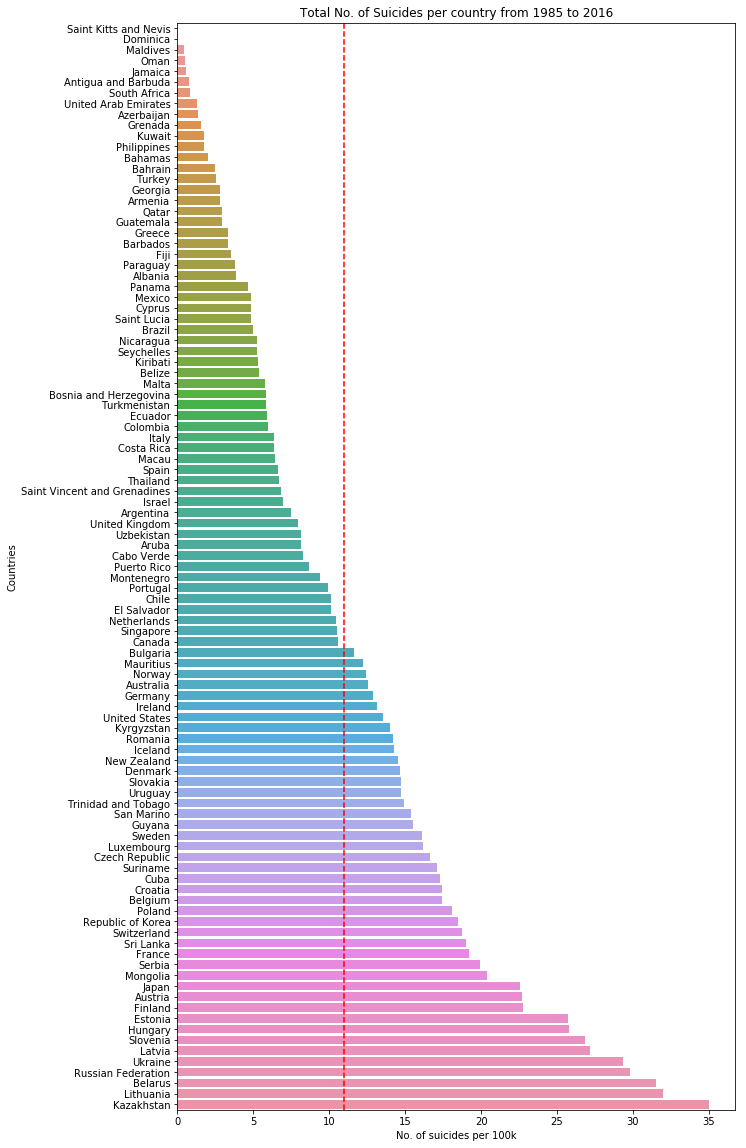

In [234]:
#The countries of Saint Kitts and Nevis and Dominica were  also ouliers as they both displayed 
#they had 0 suicides between 1985 to 2016,
#I first assumed it to be null data but it seems to be just outliers to the rest of the data.
def suicides_per_100k():
    df_country=df.groupby(["country"],as_index=False)["population","suicides_no"].sum()
    df_country["suicides_per_100k"]=df_country["suicides_no"]/(df_country["population"]/100000)
    plt.figure(figsize=(10,20))
    plt.axvline(df_country["suicides_per_100k"].mean(), color='r', linestyle='--')
    df_country.sort_values('suicides_per_100k',inplace=True)
    sns.barplot(y=df_country["country"], x=df_country["suicides_per_100k"])
    plt.xlabel('No. of suicides per 100k')
    plt.ylabel('Countries')
    plt.title('Total No. of Suicides per country from 1985 to 2016')
    return(plt.show())
suicides_per_100k()

In [106]:
#the first performance metric I utilized was the sum of squared errors

In [237]:
#Earlier in this dataset (for the EDA midterm) I had found the mean for the variable 'suicide_no' (245.74)
#I will utilize this mean to find the performance metrics and i rounded to the nearest whole number
#had an error when not using the random seed function so i used that function but set the number to 235 (mean)
from sklearn import metrics
from numpy import random

random.seed(235)

y_obs  = 2*random.randn(235)
y_pred = y_obs + .1 * random.randn(235)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_obs, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_obs, y_pred))
print("R^2:", metrics.r2_score(y_obs, y_pred))


Mean Absolute Error: 0.08168901095837834
Mean Squared Error: 0.010727450271559065
R^2: 0.9972846490648539


In [172]:
from sklearn.cluster import KMeans
from scipy import stats
df_tr = df


df_tr = pd.get_dummies(df_tr, columns=['suicides_no'])

#Standardize
clmns = ['sex', 'year', 'generation']
df_tr_std = stats.zscore(df_tr[clmns])

#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print (df_tr[clmns])

       sex  year  generation  clusters
14568    1  1997           1         1
2945     2  1989           4         0
11868    1  2001           1         1
21440    1  1998           4         1
17984    2  1995           4         0
11813    2  1996           2         0
597      2  1985           1         0
12047    1  2016           3         1
19833    2  1997           1         0
3131     2  2009           5         0
4614     1  1990           1         1
24413    2  1990           1         0
6232     2  2003           2         0
16274    2  1992           4         0
1567     2  1996           1         0
13986    1  2010           6         1
24136    2  1995           3         0
2124     1  2013           1         1
5539     2  2007           6         0
11255    2  2004           5         0
8696     2  2008           1         0
8146     2  1997           4         0
24820    2  2002           5         0
2914     1  1987           2         1
12346    1  2009         

Text(28.340520833333343, 0.5, 'Year')

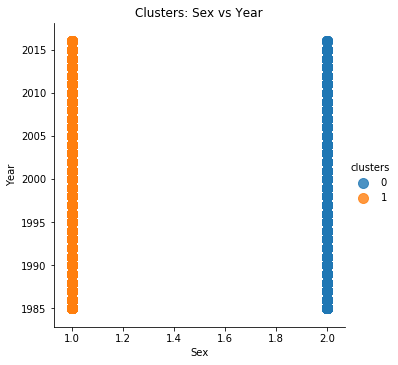

In [180]:
sns.lmplot('sex', 'year',
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters: Sex vs Year')
plt.xlabel('Sex')
plt.ylabel('Year')

Text(25.82372395833334, 0.5, 'generation')

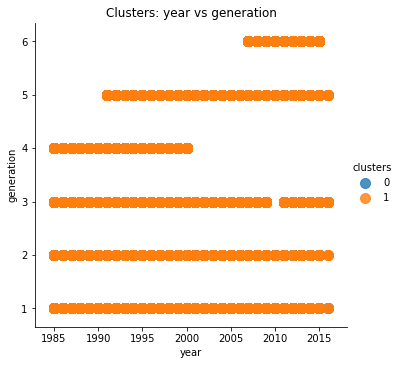

In [179]:
sns.lmplot('year', 'generation',
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters: year vs generation')
plt.xlabel('year')
plt.ylabel('generation')

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


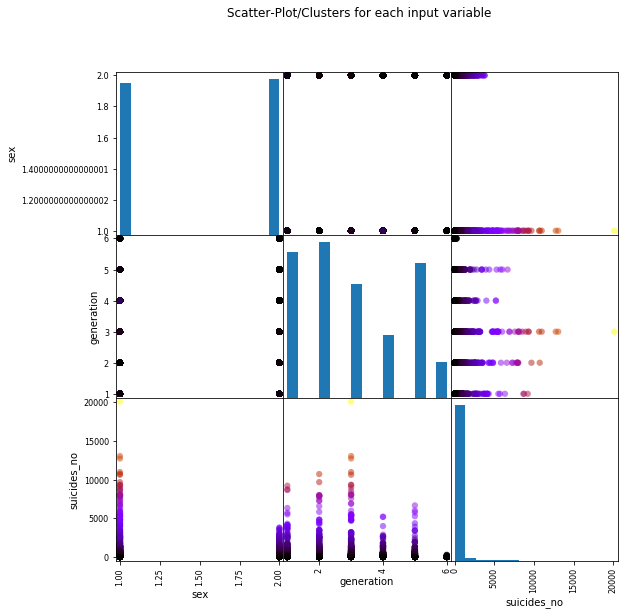

In [181]:
#issue with the k-means method so I utalized scatterplots to determine and showcase clusters
#Outliers from the boomer generation as they suddenly got an influx of suicides 
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['sex', 'generation', 'country', 'suicides_no']
X = df[feature_names]
y = df['suicides_no']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-Plot/Clusters for each input variable')
plt.savefig('suicide_scatter_matrix')

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


571.0673924492344
[0.01035594]
Y = [0.01035594] X+571.0673924492344


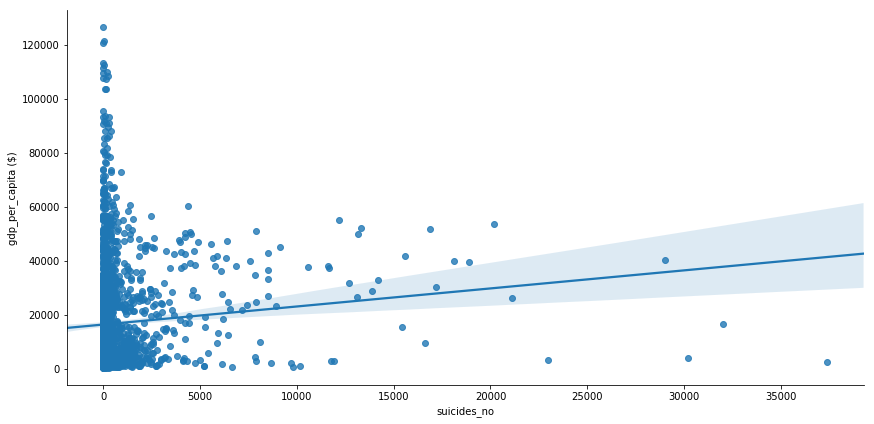

In [232]:
#noticed scatterplot worked alot better when using gdp 
from sklearn.linear_model import LinearRegression

def gdp():
    df_gdp = df.groupby(["country","year","gdp_per_capita ($)"],as_index=False)["population","suicides_no"].sum()
    df_country=df.groupby(["year","sex"],as_index=False)["population","suicides_no"].sum()

    df_gdp["suicides_per_100k"] = df_gdp["suicides_no"]/(df_country["population"]/100000)
    sns.pairplot(df_gdp, x_vars=['suicides_no'], y_vars=["gdp_per_capita ($)"], height=6, aspect=2, kind='reg')
    X = df_gdp["gdp_per_capita ($)"].values.reshape(-1,1)
    y = df_gdp["suicides_no"]
    lm = LinearRegression()
    
    lm.fit(X,y)
    print(lm.intercept_)
    print(lm.coef_)
    print("Y = {}".format(lm.coef_),"X+{}".format(lm.intercept_))
gdp()

In [205]:
#zscore test
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics
#Here I used two different means from different years of the variable 'suicides_no'
zscore_test_stat = ((252 - 235)*math.sqrt(8916))/825
print(zscore_test_stat)

1.945718475441638


In [222]:
#hypothesis test to determine if we are accepting or rejecting the null hypothesis 
from scipy.stats import ttest_1samp
import scipy.stats as stats
#print(df)
suicides_no_mean = np.mean(df)
print(suicides_no_mean)
tset, pval = ttest_1samp(suicides_no_mean, 30)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

year                  2.001219e+03
sex                   1.505248e+00
suicides_no           2.357658e+02
population            1.817300e+06
suicides/100k pop     1.276270e+01
HDI for year          7.758941e-01
gdp_per_capita ($)    1.719974e+04
generation            2.992092e+00
dtype: float64
p-values 0.34519817750647264
we are accepting null hypothesis


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


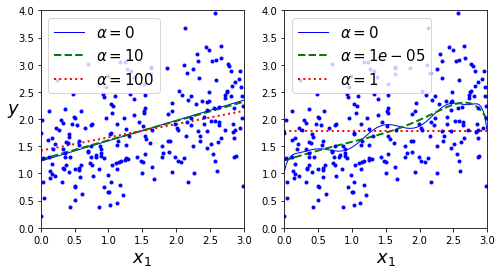

In [223]:
#Creared both a ridge linear model and a lasso linear model, utalizing the mean value from the # of suicides
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

m = 6
X = 3 * np.random.rand(235, 1)
y = 1 + 0.5 * X + np.random.randn(235, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()